# Debugging and performances

In [1]:
# Hidden cell
import os, sys
import numpy as np
import pandas as pd
import xarray as xr
print("xarray: %s, %s" % (xr.__version__, xr.__file__))

import matplotlib.pyplot as plt
%matplotlib inline
sys.path.insert(0, os.path.abspath('/Users/gmaze/git/github/gmaze/pyxpcm'))

import pyxpcm
print("pyxpcm: %s, %s" % (pyxpcm.__version__, pyxpcm.__file__))

xarray: 0.14.2.dev62+g6d1434e9, /Users/gmaze/anaconda/envs/obidam36/lib/python3.6/site-packages/xarray/__init__.py


pyxpcm: 0.4.0, /Users/gmaze/git/github/gmaze/pyxpcm/pyxpcm/__init__.py


**Import and set-up**

Import the library and toy data

In [2]:
import pyxpcm
from pyxpcm.models import pcm

# Load a dataset to work with:
ds = pyxpcm.tutorial.open_dataset('argo').load()

# Define vertical axis and features to use:
z = np.arange(0.,-1000.,-10.)
features_pcm = {'temperature': z, 'salinity': z}
features_in_ds = {'temperature': 'TEMP', 'salinity': 'PSAL'}

## Debugging

Use option ``debug`` to print log messages 

In [3]:
# Instantiate a new PCM:
m = pcm(K=8, features=features_pcm, debug=True)

# Fit with log:
m.fit(ds, features=features_in_ds);

> Start preprocessing for action 'fit'



	> Preprocessing xarray dataset 'TEMP' as PCM feature 'temperature'
	 [<class 'xarray.core.dataarray.DataArray'>, <class 'dask.array.core.Array'>, ((7560,), (282,))] X RAVELED with success
		Output axis is in the input axis, not need to interpolate, simple intersection
	 [<class 'xarray.core.dataarray.DataArray'>, <class 'dask.array.core.Array'>, ((7560,), (100,))] X INTERPOLATED with success)
	 [<class 'xarray.core.dataarray.DataArray'>, <class 'numpy.ndarray'>, None] X SCALED with success)
	 [<class 'xarray.core.dataarray.DataArray'>, <class 'numpy.ndarray'>, None] X REDUCED with success)
	temperature pre-processed with success,  [<class 'xarray.core.dataarray.DataArray'>, <class 'numpy.ndarray'>, None]
	Homogenisation for fit of temperature

	> Preprocessing xarray dataset 'PSAL' as PCM feature 'salinity'


	 [<class 'xarray.core.dataarray.DataArray'>, <class 'dask.array.core.Array'>, ((7560,), (282,))] X RAVELED with success
		Output axis is in the input axis, not need to interpolate, simple intersection
	 [<class 'xarray.core.dataarray.DataArray'>, <class 'dask.array.core.Array'>, ((7560,), (100,))] X INTERPOLATED with success)
	 [<class 'xarray.core.dataarray.DataArray'>, <class 'numpy.ndarray'>, None] X SCALED with success)
	 [<class 'xarray.core.dataarray.DataArray'>, <class 'numpy.ndarray'>, None] X REDUCED with success)
	salinity pre-processed with success,  [<class 'xarray.core.dataarray.DataArray'>, <class 'numpy.ndarray'>, None]
	Homogenisation for fit of salinity
	Features array shape and type for xarray: (7560, 30) <class 'numpy.ndarray'> <class 'memoryview'>
> Preprocessing done, working with final X (<class 'xarray.core.dataarray.DataArray'>) array of shape: (7560, 30)  and sampling dimensions: ['N_PROF']


## Performance / Optimisation

Use ``timeit`` and ``timeit_verb`` to compute computation time of PCM operations

Times are accessible as a pandas Dataframe in ``timeit`` pyXpcm instance property.

The pyXpcm ``m.plot.timeit()`` plot method allows for a simple visualisation of times.

### Time readings during execution

In [4]:
# Create a PCM and execute methods:
m = pcm(K=8, features=features_pcm, timeit=True, timeit_verb=1)
m.fit(ds, features=features_in_ds);

  fit.1-preprocess.1-mask: 20 ms
  fit.1-preprocess.2-feature_temperature.1-ravel: 29 ms
  fit.1-preprocess.2-feature_temperature.2-interp: 0 ms
  fit.1-preprocess.2-feature_temperature.3-scale_fit: 7 ms
  fit.1-preprocess.2-feature_temperature.4-scale_transform: 4 ms
  fit.1-preprocess.2-feature_temperature.5-reduce_fit: 10 ms
  fit.1-preprocess.2-feature_temperature.6-reduce_transform: 2 ms
  fit.1-preprocess.2-feature_temperature.total: 55 ms
  fit.1-preprocess: 56 ms
  fit.1-preprocess.3-homogeniser: 1 ms
  fit.1-preprocess.2-feature_salinity.1-ravel: 25 ms
  fit.1-preprocess.2-feature_salinity.2-interp: 0 ms
  fit.1-preprocess.2-feature_salinity.3-scale_fit: 7 ms
  fit.1-preprocess.2-feature_salinity.4-scale_transform: 4 ms
  fit.1-preprocess.2-feature_salinity.5-reduce_fit: 9 ms
  fit.1-preprocess.2-feature_salinity.6-reduce_transform: 2 ms
  fit.1-preprocess.2-feature_salinity.total: 51 ms
  fit.1-preprocess: 51 ms
  fit.1-preprocess.3-homogeniser: 1 ms
  fit.1-preprocess.4-xarr

  fit.fit: 2675 ms
  fit.score: 9 ms
  fit: 2817 ms


### A posteriori Execution time analysis

In [5]:
# Create a PCM and execute methods:
m = pcm(K=8, features=features_pcm, timeit=True, timeit_verb=0)
m.fit(ds, features=features_in_ds);
m.predict(ds, features=features_in_ds);
m.fit_predict(ds, features=features_in_ds);

In [6]:
m.timeit

Method       Sub-method    Sub-sub-method         Sub-sub-sub-method
fit          1-preprocess  1-mask                 total                   19.667864
                           2-feature_temperature  1-ravel                 28.775930
                                                  2-interp                 0.649929
                                                  3-scale_fit             10.529041
                                                  4-scale_transform        4.294872
                                                  5-reduce_fit            11.734009
                                                  6-reduce_transform       2.493382
                                                  total                   58.599949
                           total                                         232.898712
                           3-homogeniser          total                    2.095938
                           2-feature_salinity     1-ravel                 20.290136
       

## Visualisation help

### Main steps by method

Sub-method,1-preprocess,fit,predict,score,xarray
Method,,,,,
fit,464.207888,1721.768379,NaN,8.548021,NaN
fit_predict,298.304796,1801.964045,7.369041,8.421898,5.813122
predict,318.270445,NaN,8.524895,8.650064,6.422997


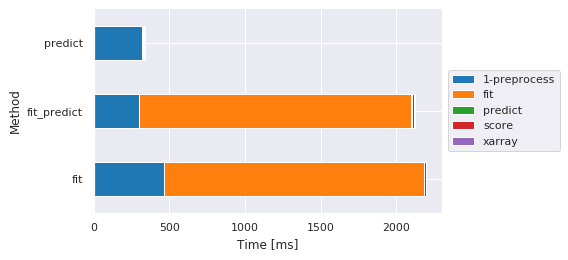

In [7]:
fig, ax, df = m.plot.timeit(group='Method', split='Sub-method', style='darkgrid') # Default group/split
df

### Preprocessing main steps by method

Sub-sub-method,1-mask,2-feature_salinity,2-feature_temperature,3-homogeniser,4-xarray
Method,,,,,
fit,19.667864,91.470957,117.077112,2.095938,0.997305
fit_predict,21.162987,61.383009,62.474728,2.356052,0.961065
predict,18.440008,64.152002,73.935270,0.808954,1.005888


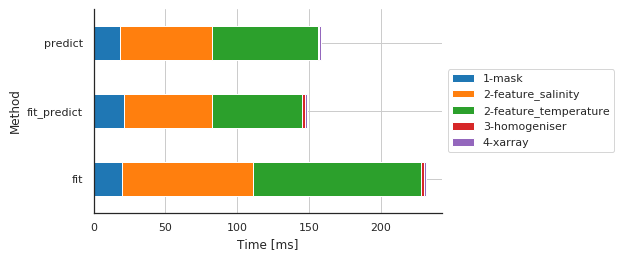

In [8]:
fig, ax, df = m.plot.timeit(group='Method', split='Sub-sub-method')
df

### Preprocessing details by method

Sub-sub-sub-method,1-ravel,2-interp,3-scale_fit,4-scale_transform,5-reduce_fit,6-reduce_transform
Method,,,,,,
fit,49.066067,1.260996,18.373013,8.629560,21.888256,4.935265
fit_predict,43.777943,1.287699,0.002861,10.781765,0.002146,5.966187
predict,54.390907,1.282930,0.002146,8.505106,0.002861,4.762173


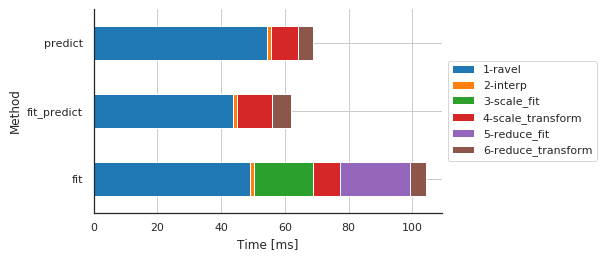

In [9]:
fig, ax, df = m.plot.timeit(group='Method', split='Sub-sub-sub-method')
df

### Preprocessing details by features

Sub-sub-sub-method,1-ravel,2-interp,3-scale_fit,4-scale_transform,5-reduce_fit,6-reduce_transform
Sub-sub-method,,,,,,
2-feature_salinity,0.068546,0.001903,0.007846,0.012867,0.010156,0.007026
2-feature_temperature,0.078689,0.001929,0.010532,0.015050,0.011737,0.008637


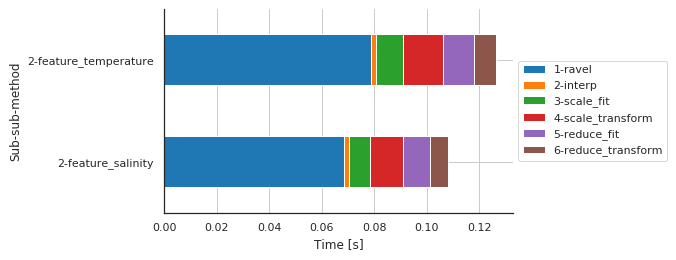

In [10]:
fig, ax, df = m.plot.timeit(split='Sub-sub-sub-method', group='Sub-sub-method', unit='s')
df